# **Marvel Characters Partnership Network**
### Social Network Analysis Project by :

*Contino Andrea* 284471

*Ceccarelli Pierpaolo* 284451

*Zannella Piergiorgio* 284951

*Sebastiani Mattia* 288071

***

## **Introduction**

The Marvel Characters Partnership Network that we chose to analize is a disconnected, unweighted and undirected graph, that represents every partnership between characters in the Marvel Universe (including movies and comics).The partnership network was extracted from Wikipedia pages of these characters, which indicate partnership relations with other such pages.

In our graph nodes represent either heroes or villains and the links between them represent their partnership. The graph contains 350 nodes and 346 edges making it considerable as sparse because of this low node-to-edge ratio.

Below a representation of the network with colored nodes depending on the faction of partnerships they stay in. We obtained this graph by implementing Gephi for visualization purposes.

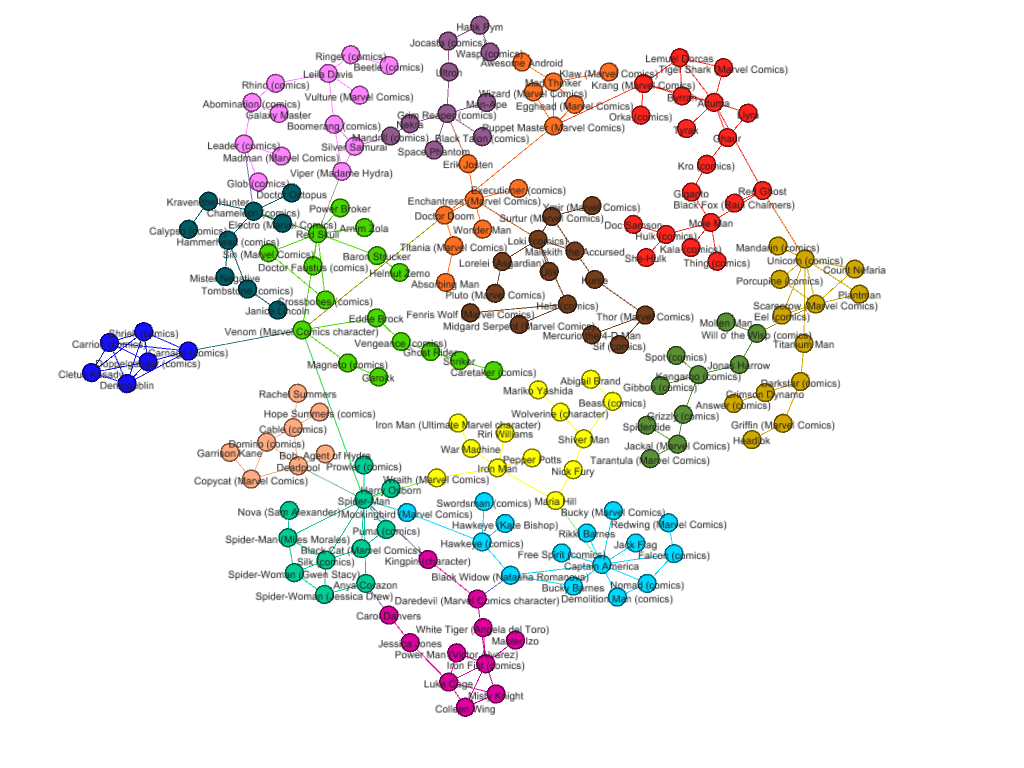

***

# **Week 1**

a) Pick a social network among the one proposed on luiss.learn

b) Implement it in Python.

c) Draw the graph 

d) Compute the number of nodes,edges, average degree and the density. Comment.



### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

### Implementing the social network

In [ ]:
# Load nodes CSV into a pandas DataFrame
df_nodes = pd.read_csv("nodes.csv")
df_nodes.columns = [col.strip() for col in df_nodes.columns]  # Strip spaces from column names


# Parse the _pos column to convert it to a numpy array
def parse_pos_updated(pos_string):
    numbers = [float(num) for num in pos_string.replace("array([", "").replace("])", "").split(",")]
    return np.array(numbers)
df_nodes['_pos'] = df_nodes['_pos'].apply(parse_pos_updated)

# Load edges CSV into a pandas DataFrame
df_edges = pd.read_csv("edges.csv")

In [ ]:
def load_graph_data(nodes_file="nodes.csv", edges_file="edges.csv"):
    # Load nodes CSV into a pandas DataFrame
    df = pd.read_csv(nodes_file)
    df.columns = [col.strip() for col in df.columns]  # Strip spaces from column names

    # Parse the _pos column to convert it to a numpy array
    def parse_pos_updated(pos_string):
        numbers = [float(num) for num in pos_string.replace("array([", "").replace("])", "").split(",")]
        return np.array(numbers)

    df['_pos'] = df['_pos'].apply(parse_pos_updated)

    # Load edges CSV into a pandas DataFrame
    df_edges = pd.read_csv(edges_file)

    return df, df_edges

df_nodes, df_edges = load_graph_data()



### Creating and drawing the graph

In [ ]:
def create_graph(df, df_edges):
    # Create an empty graph
    G = nx.Graph()

    # Add nodes to the graph
    for index, row in df.iterrows():
        G.add_node(row['# index'], label=row['id'], group=row['group'], size=row['size'], pos=row['_pos'])

    # Add edges to the graph
    for index, row in df_edges.iterrows():
        G.add_edge(row['# source'], row[' target'])

    return G

G = create_graph(df_nodes, df_edges)


In [ ]:
def plot_graph(G, scalar=10):
    # Set up the figure and axis
    plt.figure(figsize=(15, 15))
    ax = plt.gca()

    # Extract node positions and sizes from the graph
    pos = {node: attributes['pos'] for node, attributes in G.nodes(data=True)}
    n_size = [attributes['size'] for node, attributes in G.nodes(data=True)]
    scaled_node_sizes = [size * scalar for size in n_size]

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=scaled_node_sizes, ax=ax)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax)

    # Set the title
    ax.set_title("Network Graph")

    # Hide the axis
    ax.axis("off")

    plt.show()

plot_graph(G)

In [ ]:
def plot_graph_with_labels(G, scalar = 10, font_size=6):

    # Set up a larger figure for visualization
    plt.figure(figsize=(20, 20))
    ax = plt.gca()

    pos = {node: attributes['pos'] for node, attributes in G.nodes(data=True)}
    n_size = [attributes['size'] for node, attributes in G.nodes(data=True)]
    scaled_node_sizes = [size * scalar for size in n_size]

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=scaled_node_sizes, ax=ax)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax)

    # Draw node labels using the 'id' attribute
    labels = {node: attributes['label'] for node, attributes in G.nodes(data=True)}
    nx.draw_networkx_labels(G, pos, labels, font_size=font_size, alpha=0.7, ax=ax)

    # Set title and hide axis
    ax.set_title("Network Graph with Node Labels")
    ax.axis("off")

    plt.show()

plot_graph_with_labels(G)


In [ ]:
def compute_metrics(G):
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges() 
    avg_degree = sum(dict(G.degree()).values()) / num_nodes 
    density= 2*num_edges/(num_nodes*(num_nodes-1))
    return num_nodes, num_edges, avg_degree, density

df_metrics = pd.DataFrame(columns=["num_nodes", "num_edges", "avg_degree", "density"])
df_metrics.loc["G"] = compute_metrics(G)
df_metrics.style.hide(axis="index")

# Analisys
The graph is undirected, unweighted and not connected and it contains 350 node and 346 edges. The average degree is 1.98 and has a density of 0.0057.
The metrics suggest that the graph represents a sparse network with nodes having limited connections. 

***

# **Week 2** 

We choose to compute the average clustering and transitivy number, because the concept of distance and diameter is a less relevant metric than the average clustering and transitivity number for a disconnected graph as the one that we chose.

##### a) Compute Average clustering and Transitivity number

Before computing average clustering and transitivity we have to check if the graph is connected or disconnected.

In [ ]:
is_connected = nx.is_connected(G)

# If the graph is not connected, find the largest connected component
if not is_connected:
    largest_cc = max(nx.connected_components(G), key=len)
    sub_G = G.subgraph(largest_cc)
else:
    sub_G = G

print("Is the graph connected?", is_connected)
print("Since the graph is not connected, we will use the largest connected component instead.")

In [ ]:
def compute_network_metrics(sub_G):
    
    # Average Clustering
    avg_clustering = nx.average_clustering(sub_G)

    # Transitivity using networkx built-in function
    transitivity_nx = nx.transitivity(sub_G)

    return avg_clustering, transitivity_nx

compute_network_metrics(sub_G)

#create a dataframe to store the metrics
df_clutra = pd.DataFrame(columns=["avg_clustering", "transitivity_nx"])
df_clutra.loc["sub_G"] = compute_network_metrics(sub_G)
df_clutra.style.hide(axis="index")

##### b) Implement a function computing the transitivity using basic function of networkx

We are now defining our own functions to compute the transitivity that is decomposed in two parts:

count_triangles(graph)

1) It initializes a counter, triangles, to zero and iterates over each node in the graph.

2) For each node, it finds the list of its neighbors.

3) It checks all pairs of neighbors to see if they are connected to each other, thus forming a triangle with the original node.

4) It counts the triangles and divides the final count by 3.

compute_transitivity(graph)

1) It calls count_triangles(graph) to get the number of triangles in the graph.

2) It then counts the number of "connected triplets" for each node. A connected triplet is a single vertex with edges running to an unordered pair of others.

3) Computes the transitivity number.

In [ ]:
# Triangles
def count_triangles(graph):
    triangles = 0
    for node in graph.nodes():
        neighbors = list(graph.neighbors(node))
        for i in range(len(neighbors)):
            for j in range(i + 1, len(neighbors)):
                u, v = neighbors[i], neighbors[j]
                if graph.has_edge(u, v):
                    triangles += 1
    return triangles / 3 

# Transitivity
def compute_transitivity(graph):
    triangles = count_triangles(graph) 
    connected_triplets = 0
    for node in graph.nodes():
        k = len(list(graph.neighbors(node)))
        connected_triplets += k * (k - 1) // 2
    
    if connected_triplets == 0:
        return 0
    else:
        return (3 * triangles) / connected_triplets

print("Transitivity with our own function :",compute_transitivity(sub_G))

# Analisys
The average clustering is 0.1761 and the transitivity number is 0.2163. This means that the graph is not clustered and that the nodes are not connected to each other. The average clustering coefficient is lower than the transitivity, this suggests that clustering is more prevalent among nodes with a lower degree, because nodes with an high degree will pull down the average clustering coefficient. These values suggest that the network has a moderate level of local and global clustering. However it's hard to judge whether these values are high, low, or typical.

***

# **Week 3**

Depending on what seems more relevant in your graph, pick one of the following local notions
1) Decay centrality
2) Betweeness centrality
3) Closeness centrality
4) Clustering

a) Discuss why you picked this measure and who is the most central in your network based on your
choice.

We chose to compute the betweenness centrality of the nodes of our graph because by observing it we noticed that it has a structure with many groups and clusters. We think it's more relevant to compute the betweennes centrality that is useful to identify the nodes that connect disparate groups.

b) Provide a code computing the given centrality using basic functions of networkx (you are not allowed to use directly nx."what you want").

In [ ]:
def calculate_betweenness(graph):
    node_list = list(graph.nodes())
    centrality_scores = {node: 0.0 for node in node_list}

    for source_node in node_list:
        path_stack, predecessors, path_counts = find_shortest_paths(graph, source_node)

        accum_scores = {node: 0 for node in node_list}
        while path_stack:
            current_node = path_stack.pop()
            score_factor = (1.0 + accum_scores[current_node]) / path_counts[current_node]
            for predecessor in predecessors[current_node]:
                accum_scores[predecessor] += path_counts[predecessor] * score_factor
            if current_node != source_node:
                centrality_scores[current_node] += accum_scores[current_node]

    normalize_factor = (len(node_list) - 1) * (len(node_list) - 2)
    for node in centrality_scores:
        centrality_scores[node] /= normalize_factor

    return centrality_scores
def find_shortest_paths(graph, start_node):
    visited = []
    predecessor_map = {v: [] for v in graph}
    path_count = {v: 0 for v in graph}
    distances = {v: float('inf') for v in graph}
    path_count[start_node] = 1
    distances[start_node] = 0
    queue = [start_node]

    while queue:
        current = queue.pop(0)
        visited.append(current)
        current_distance = distances[current]
        path_count_current = path_count[current]
        for neighbor in graph[current]:
            if distances[neighbor] == float('inf'):
                queue.append(neighbor)
                distances[neighbor] = current_distance + 1
            if distances[neighbor] == current_distance + 1:
                path_count[neighbor] += path_count_current
                predecessor_map[neighbor].append(current)

    return visited, predecessor_map, path_count

#Calculate and get the maximum betweenness centrality
custom_results = calculate_betweenness(G)
max_value = max(custom_results.values())
max_node = max(custom_results, key=custom_results.get)

# Compute the max betweenness centrality using networkx built-in function to check the results
betweenness_nx_function = nx.betweenness_centrality(G)
max_value_nx_function = max(betweenness_nx_function.values())
max_node_nx_function = max(betweenness_nx_function, key=betweenness_nx_function.get)

max_value, max_node, max_value_nx_function, max_node_nx_function

df_beetweenness = pd.DataFrame(columns=["max_value", "max_node", "max_value_nx_function", "max_node_nx_function"])
df_beetweenness.loc["G"] = [max_value, max_node, max_value_nx_function, max_node_nx_function]
df_beetweenness.style.hide(axis="index")


From our calculation we got that the node with the highest betweenness centrality is Venom (node 9) that has a 0.1762 betweenness centrality value.

c) Provide the cumulative distribution for this centrality and give a graphical representation of your graph (log-log, log or normal representation as you think it is more relevant)

In [ ]:
# Generate the cumulative distribution for betweenness centrality
sorted_betweenness = sorted(custom_results.values(), reverse=True)
cumulative_dist = np.cumsum(sorted_betweenness) / sum(sorted_betweenness)

# Plot the cumulative distribution in a log-log scale
plt.figure(figsize=(10, 7))
plt.loglog(sorted_betweenness, cumulative_dist, marker='.', linestyle='-')
plt.title("Cumulative Distribution of Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Cumulative Fraction")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


We chose a loglog representation to represent our data on the betweenness centrality cumulative distribution of our graph because on other representation many points in the graph got cramped up together, so the loglog representation is the most suiting display of our data.

***

# **Week 5**

a) Write a function to compute the PageRank of the nodes in a graph (you are not allowed to use built-in functions from NetworkX).

b) Run it on your graph using α = 0.15, save the total number of iterations, and check that your function returns the same results (in terms of the scores) as the built-in function from NetworkX.

In [ ]:
def PageRank(graph,damping_factor, max_iterations=100, tolerance=1e-6):
    # Initialize the PageRank values
    pagerank = {node: 1 / len(graph) for node in graph}

    # Initialize the iteration counter
    total_iterations = 0

    # Iterate until convergence or maximum number of iterations is reached
    for i in range(max_iterations):
        total_iterations += 1
        prev_pagerank = pagerank.copy()
        for node in graph:
            incoming_nodes = [other_node for other_node in graph if node in graph[other_node]]
            incoming_weights = sum(prev_pagerank[other_node] / len(graph[other_node]) for other_node in incoming_nodes)
            pagerank[node] = (1 - damping_factor) / len(graph) + damping_factor * incoming_weights
        # Check for convergence
        if sum(abs(pagerank[node] - prev_pagerank[node]) for node in graph) < tolerance:
            break

    return pagerank, total_iterations

In [ ]:
pagerank_builtin = nx.pagerank(G, alpha=0.15, tol=1e-6, max_iter=100),
pagerank_builtin_dict=pagerank_builtin[0]

pagerank_results = PageRank(G, 0.15)
pagerank_results_dict = pagerank_results[0]

In [ ]:
# Change this variable to decide how many digits you want to compare
n_digits = 4

# Compare the results
def compare_results(dict1, dict2):
    x = 0
    for key in dict1:
        if round(dict1[key], n_digits) != round(dict2[key], n_digits):
            x += 1
            print(f"Node {key} has different PageRank values: {round(dict1[key], n_digits)} vs {round(dict2[key], n_digits)}")       
    return x
        
results_comparation = compare_results(pagerank_results_dict, pagerank_builtin_dict)

if results_comparation == 0:
    print("The results are the same until the " + str(n_digits) + "th decimal digit.")

# Analisys
By using the compare function above we compared the results of our built-in function and the NetworkX function and our results are equal to the NetworkX result up to the fourth decimal digit for all the nodes. For a larger number of decimal digits we have some really slitght imperfection compare to the NetworkX function.

c) Identify the node with the highest PageRank, compare it with the one you got from week 3, and give an interpretation to the possible difference.

In [ ]:
# Node with highest value of PageRank
value_max = max(list(pagerank_results_dict.values()))
index_max = list(pagerank_results_dict.values()).index(value_max) 

# find the label of the node with the index_max in G
node_labels = nx.get_node_attributes(G, 'label')
node_max = node_labels[index_max]

print("Node with highest value of PageRank is", node_max, "with index", index_max, "and value", value_max)


In [ ]:
df_pagerank_comparisons = pd.DataFrame(columns=['Name','Node','Betweenness Centrality','PageRank'])
df_pagerank_comparisons.loc[0] = [node_max, index_max, betweenness_nx_function[index_max], value_max]
df_pagerank_comparisons.loc[1] = [node_labels[max_node_nx_function], max_node_nx_function, max_value_nx_function, pagerank_results_dict[max_node_nx_function]]
df_pagerank_comparisons.style.hide(axis="index")

# Analisys
Captain America (Node 301) is involved in fewer, but more significant connections. His higher PageRank suggests a strong influence or prominence within the network, possibly due to direct relationships with other key characters or events.

Venom (Node 9), on the other hand, seems to act more as a bridge or connector in the Marvel Comics universe, involved in storylines that link various characters and events. This role as a connector does not necessarily translate to being the most central or 'important' character in terms of direct influence or prominence.

This analysis reflects the different roles these characters play within the Marvel Comics universe, with Venom as a pivotal link among various elements of the universe, and Captain America as a more central and influential figure within key storylines.

d) Provide the cumulative distribution, compare it with the one you got from week 3, and comment the results. 

In [ ]:
# Plot the cumulative distribution in a log-log scale
sorted_betweenness = sorted(custom_results.values(), reverse=True)
cumulative_dist = np.cumsum(sorted_betweenness) / sum(sorted_betweenness)
plt.figure(figsize=(10, 7))
plt.loglog(sorted_betweenness, cumulative_dist, marker='.', linestyle='-')
plt.title("Cumulative Distribution of Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Cumulative Fraction")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Plot the cumulative distribution of Pagerank in a log-log scale
sorted_pagerank = sorted(pagerank_results_dict.values(), reverse=True)
cumulative_dist = np.cumsum(sorted_pagerank) / sum(sorted_pagerank)
plt.figure(figsize=(10, 7))
plt.loglog(sorted_pagerank, cumulative_dist, marker='.', linestyle='-')
plt.title("Cumulative Distribution of PageRank")
plt.xlabel("PageRank")
plt.ylabel("Cumulative Fraction")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


# Analisys
#### Betweennes Centrality Cumulative Distribution Graph:
This graph shows that most nodes have a low betweenness centrality, with a very steep curve at the lower end of the centrality values. It then gradually flattens out, indicating that fewer nodes have high betweenness centrality.
#### Pagerank Cumulative Distribution Graph:
This graph similarly shows that many nodes have a low PageRank value, with the distribution being less steep compared to the betweenness centrality graph, especially at the lower end of the PageRank values. This suggests that while there are many nodes with low PageRank, their values are more evenly distributed than those of betweenness centrality.

e) Optional: Re-run the PageRank using α = 0.5, save the total number of iterations, compare with the results (in terms of both the number of iterations and the cumulative distribution) obtained for α = 0.15, and comment.

In [ ]:
pagerank_results = PageRank(G, 0.5)
pagerank_results_dict = pagerank_results[0]

# Node with highest value of PageRank
value_max = max(list(pagerank_results_dict.values()))
index_max = list(pagerank_results_dict.values()).index(value_max) 

# find the label of the node with the index_max in G
node_labels = nx.get_node_attributes(G, 'label')
node_max = node_labels[index_max]

print(node_max, index_max, value_max)

# Plot the cumulative distribution of Pagerank in a log-log scale
sorted_pagerank = sorted(pagerank_results_dict.values(), reverse=True)
cumulative_dist = np.cumsum(sorted_pagerank) / sum(sorted_pagerank)
plt.figure(figsize=(10, 7))
plt.loglog(sorted_pagerank, cumulative_dist, marker='.', linestyle='-')
plt.title("Cumulative Distribution of PageRank")
plt.xlabel("PageRank")
plt.ylabel("Cumulative Fraction")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Analisys
By changing the damping value of Pagerank to 0.5, the Pagerank values became less discriminating, meaning that the PageRank values are more evenly distributed across nodes. Pages that had benefitted from being linked by highly ranked pages may see a decrease in their PageRank score, while pages that had a lower score may see an increase due to the higher jump probability evening out the chances of any page being landed on.

***

# **Week 6**

Treat your graph as undirected and unweighted. Delete loops and work on the resulting largest connected component.

1) Implement the following three techniques for community detection: 

a) Bridge removal (pick the partition with the highest modularity), 
b) Modularity optimization,
c) Label propagation. 

In this case, you are allowed to use built-in functions from NetworkX. 

In [ ]:
# Compute the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
sub_G = G.subgraph(largest_cc)

# Compute time elapsed
start_time = time.time()

# Girvan-Newman algorithm
partitions = nx.community.girvan_newman(sub_G)   

# Function to find the best partition
def find_best_partition(partitions, sub_G):
    max_modularity = 0
    best_partition = None
    for partition in partitions:
        modularity = nx.community.quality.modularity(sub_G, partition)
        if modularity > max_modularity:
            max_modularity = modularity
            best_partition = partition
    return best_partition

best_partition_girvan_newman = find_best_partition(partitions, sub_G)
max_modularity = nx.community.quality.modularity(sub_G, best_partition_girvan_newman)

end_time = time.time()
ct_girvan_newman = end_time - start_time
print("Time elapsed:", ct_girvan_newman, "seconds")
print("The partition in communities with the highest modularity is ", best_partition_girvan_newman)
print("The modularity score of the partition is", max_modularity)

def plot_partitioned_graph(sub_G, best_partition, scalar=10):
    
    # Set up the figure and axis
    plt.figure(figsize=(10, 10))
    ax = plt.gca()

    # Extract node positions and sizes from the graph
    pos = {node: attributes['pos'] for node, attributes in sub_G.nodes(data=True)}
    n_size = [attributes['size'] for node, attributes in sub_G.nodes(data=True)]
    scaled_node_sizes = [size * scalar for size in n_size]

    # Create a color map for communities
    color_map = []
    for node in sub_G.nodes():
        for i, community in enumerate(best_partition):
            if node in community:
                color_map.append(plt.cm.tab20.colors[i % len(plt.cm.tab20.colors)])
                break

    # Draw the nodes with community colors
    nx.draw_networkx_nodes(sub_G, pos, node_color=color_map, node_size=scaled_node_sizes, ax=ax)

    # Draw the edges
    nx.draw_networkx_edges(sub_G, pos, alpha=0.2, ax=ax)

    # Draw the node labels
    labels = {node: attributes['label'] for node, attributes in sub_G.nodes(data=True)}
    nx.draw_networkx_labels(sub_G, pos, labels=labels, font_size=4, ax=ax)

    # Set the title and hide the axis
    ax.set_title("Network Graph of the Best Partition with Girvan-Newman Algorithm")
    ax.axis("off")

    plt.show()

plot_partitioned_graph(sub_G, best_partition_girvan_newman)

In [ ]:
# Compute time elapsed
start_time = time.time()

# Newman's greedy algorithm
partition_mod_newman_greedy = nx.community.greedy_modularity_communities(sub_G)
modularity_mod = nx.community.quality.modularity(sub_G, partition_mod_newman_greedy)

end_time = time.time()
ct_newman_greedy = end_time - start_time
print("Time elapsed:", ct_newman_greedy, "seconds")
print("The partition in communities that has the highest modularity with Newman's greedy algorthm is:",partition_mod_newman_greedy)
print("The modularity score of the partition is", modularity_mod)

def plot_partitioned_graph_mod(sub_G, partition_mod, scalar=10):
        
    # Set up the figure and axis
    plt.figure(figsize=(10, 10))
    ax = plt.gca()

    # Extract node positions and sizes from the graph
    pos = {node: attributes['pos'] for node, attributes in sub_G.nodes(data=True)}
    n_size = [attributes['size'] for node, attributes in sub_G.nodes(data=True)]
    scaled_node_sizes = [size * scalar for size in n_size]

    # Create a color map for communities
    color_map = []
    for node in sub_G.nodes():
        for i, community in enumerate(partition_mod):
            if node in community:
                color_map.append(plt.cm.tab20.colors[i % len(plt.cm.tab20.colors)])
                break

    # Draw the nodes with community colors
    nx.draw_networkx_nodes(sub_G, pos, node_color=color_map, node_size=scaled_node_sizes, ax=ax)

    # Draw the edges
    nx.draw_networkx_edges(sub_G, pos, alpha=0.2, ax=ax)

    # Draw the node labels
    labels = {node: attributes['label'] for node, attributes in sub_G.nodes(data=True)}
    nx.draw_networkx_labels(sub_G, pos, labels=labels, font_size=4, ax=ax)

    # Set the title and hide the axis
    ax.set_title("Network Graph of the Best Partition with Newman's Greedy Algorithm")
    ax.axis("off")

    plt.show()

plot_partitioned_graph_mod(sub_G,partition_mod_newman_greedy)

In [ ]:
start_time = time.time()

communities = nx.community.asyn_lpa_communities(sub_G)
partition_lp = [frozenset(c) for c in communities]
modularity_lp = nx.community.quality.modularity(sub_G, partition_lp)

ct_label_propagation = time.time() - start_time
print("Time elapsed:", ct_label_propagation, "seconds")
print("The partition in communities that has the highest modularity with the label propagation algorthm is:",partition_lp)
print("The modularity score of the partition is ", modularity_lp)


def plot_partitioned_graph_lp(sub_G, partition_lp, scalar=10):
    # Set up the figure and axis
    plt.figure(figsize=(10, 10))
    ax = plt.gca()

    # Extract node positions and sizes from the graph
    pos = {node: attributes['pos'] for node, attributes in sub_G.nodes(data=True)}
    n_size = [attributes['size'] for node, attributes in sub_G.nodes(data=True)]
    scaled_node_sizes = [size * scalar for size in n_size]

    # Create a color map for communities
    color_map = []
    for node in sub_G.nodes():
        for i, community in enumerate(partition_lp):
            if node in community:
                color_map.append(plt.cm.tab20.colors[i % len(plt.cm.tab20.colors)])
                break

    # Draw the nodes with community colors
    nx.draw_networkx_nodes(sub_G, pos, node_color=color_map, node_size=scaled_node_sizes, ax=ax)

    # Draw the edges
    nx.draw_networkx_edges(sub_G, pos, alpha=0.2, ax=ax)

    # Draw the node labels
    labels = {node: attributes['label'] for node, attributes in sub_G.nodes(data=True)}
    nx.draw_networkx_labels(sub_G, pos, labels=labels, font_size=4, ax=ax)

    # Set the title and hide the axis
    ax.set_title("Network Graph of the Best Partition with Label Propagation Algorithm")
    ax.axis("off")

    plt.show()

plot_partitioned_graph_lp(sub_G, partition_lp)

2) Compare the results of each technique in terms of: 
a) number of detected clusters, 
b) cluster size distribution, 
c) computational time, 
e) modularity,
Results should be represented in a table.

3) Give an interpretation to the differences and similarities between the three resulting partitions, and discuss which one you think is the best and why.

In [ ]:
# Computation
num_clusters_girvan_newman = len(best_partition_girvan_newman)
num_clusters_newman_greedy = len(partition_mod_newman_greedy)
num_clusters_label_propagation = len(partition_lp)

cluster_size_distribution_girvan_newman = [len(c) for c in best_partition_girvan_newman]
cluster_size_distribution_newman_greedy = [len(c) for c in partition_mod_newman_greedy]
cluster_size_distribution_label_propagation = [len(c) for c in partition_lp]

average_cluster_size_girvan_newman = np.mean([len(c) for c in best_partition_girvan_newman])
average_cluster_size_newman_greedy = np.mean([len(c) for c in partition_mod_newman_greedy])
average_cluster_size_label_propagation = np.mean([len(c) for c in partition_lp])

modularity_girvan_newman = max_modularity
modularity_newman_greedy = modularity_mod
modularity_label_propagation = modularity_lp

computational_time_girvan_newman = ct_girvan_newman
computational_time_newman_greedy = ct_newman_greedy
computational_time_label_propagation = ct_label_propagation

print("Number of clusers")
print("Girvan-Newman algorithm:", num_clusters_girvan_newman)
print("Newman's greedy algorithm:", num_clusters_newman_greedy)
print("Label propagation algorithm:", num_clusters_label_propagation,"\n")

print("Cluster size distribution")
print("Girvan-Newman algorithm:", cluster_size_distribution_girvan_newman)
print("Newman's greedy algorithm:", cluster_size_distribution_newman_greedy)
print("Label propagation algorithm:", cluster_size_distribution_label_propagation,"\n")

print("Average cluster size")
print("Girvan-Newman algorithm:", average_cluster_size_girvan_newman)
print("Newman's greedy algorithm:", average_cluster_size_newman_greedy)
print("Label propagation algorithm:", average_cluster_size_label_propagation,"\n")

print("Modularity")
print("Girvan-Newman algorithm:", modularity_girvan_newman)
print("Newman's greedy algorithm:", modularity_newman_greedy)
print("Label propagation algorithm:", modularity_label_propagation,"\n")

print("Computational time")
print("Girvan-Newman algorithm:", computational_time_girvan_newman)
print("Newman's greedy algorithm:", computational_time_newman_greedy)
print("Label propagation algorithm:", computational_time_label_propagation,"\n")


In [ ]:
data = {
    'Modularity': [modularity_girvan_newman, modularity_newman_greedy, modularity_label_propagation],
    'Number of clusters': [num_clusters_girvan_newman, num_clusters_newman_greedy, num_clusters_label_propagation],
    'Average cluster size': [average_cluster_size_girvan_newman, average_cluster_size_newman_greedy, average_cluster_size_label_propagation],
    'Computational time': [computational_time_girvan_newman, computational_time_newman_greedy, computational_time_label_propagation]
}

df_partition_table = pd.DataFrame(data, index =['Girvan-Newman', "Newman\'s greedy", 'Label propagation'])
df_partition_table

# Analisys

#### Girvan-Newman Algorithm:

Modularity & Clusters: With a modularity of 0.839874 and 14 distinct clusters, this algorithm demonstrates efficient community detection. The cluster sizes, ranging from 8 to 19, show a balanced distribution without extreme outliers. 

Cluster Size & Computational Time: The average cluster size is relatively large, indicating a tendency towards fewer but more substantial communities.

#### Newman's Greedy Algorithm:

Modularity & Efficiency: Exhibiting the highest modularity at 0.843092, it outperforms the other algorthms in community detection accuracy. This efficiency is coupled with a significantly shorter computational time compared to the Girvan-Newman Algorithm, making it more viable for larger networks.

Cluster Dynamics: In this case the average cluster size is relatively large but less than the Girvan-Newman algorithm. With 15 clusters and sizes varying from 6 to 19, this algorithm shows a broader range of community sizes then the Girvan-Newman algorithm, but it's normal to have a broad range of community size distribution because it's not strange in the Marvel Universe to have groups of superheroes or villains that vary in size. 

#### Label Propagation Algorithm:

Modularity & Cluster Number: Its lower modularity of around 0.71 and a much higher number of clusters (45) suggest a propensity for over-fragmentation, resulting in numerous smaller communities.

Efficiency & Applicability: The smallest average cluster size reinforces this tendency towards fragmentation. In our graph having this many small clusters seems wrong with how the Marvel Universe is structured with a wide range of size of different communities.

#### Conclusion:

In considering a balanced approach that weighs computational efficiency, detection efficiency and a more coherent result with the theme of our dataset, Newman's Greedy Algorithm emerges as the optimal choice. It strikes a commendable balance between accurately identifying community structures of a wide range of sizes that is ideal for the type of graph we are studying.

4) Provide a visualization for the partition you decided to be the best using Gephi.

In [ ]:
# Partition map for the modularity optimization
partition_map = {}
for idx, cluster_nodes in enumerate(partition_mod_newman_greedy):
    for node in cluster_nodes:
        partition_map[node] = idx


In [ ]:
# Save information of the attirbutes for each node
nx.set_node_attributes(sub_G,partition_map,'Community_mod')

for n, data in sub_G.nodes(data=True):
    for key, value in data.items():
        if isinstance(value, np.ndarray):
            data[key] = value.tolist()

for n, data in sub_G.nodes(data=True):
    if 'pos' in data and isinstance(data['pos'], list):
        data['pos'] = str(data['pos'])

# Write the graph to a GEXF file
gexf_file_path = "graph_with_partition.gexf"
# nx.write_gexf(sub_G, gexf_file_path)
# Made as a comment to avoid overwriting the file

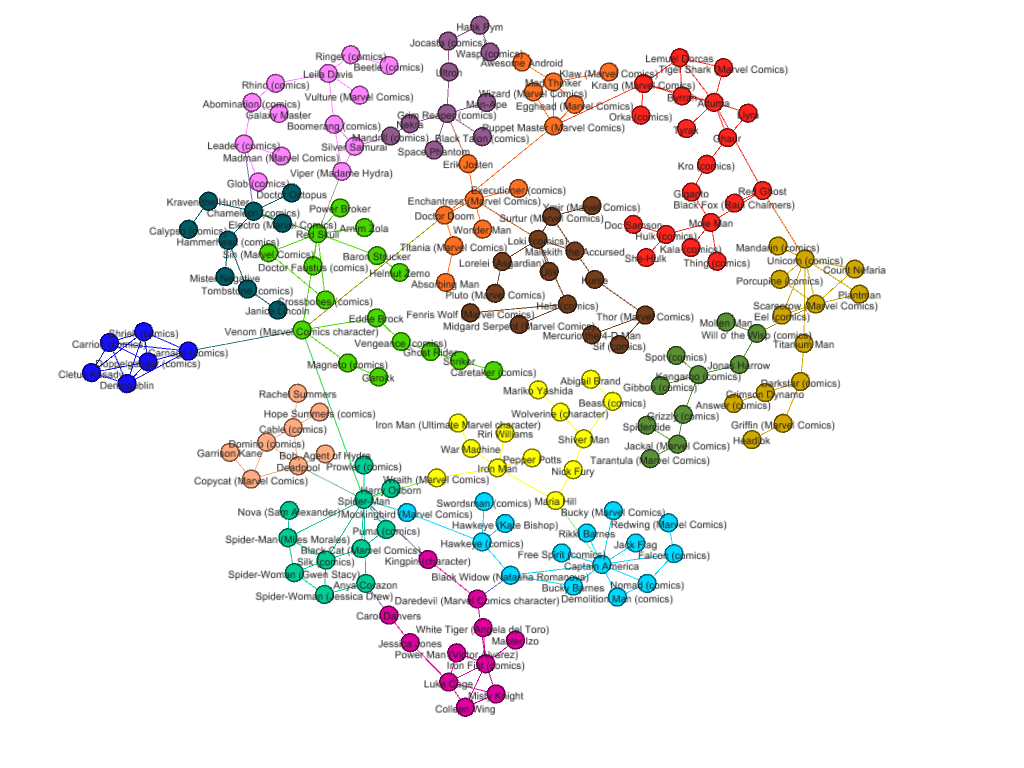

5) Optional: for each pair of partitions compute the NMI between them and discuss.

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

def create_partition_vector(partition, nodes_df):
    partition_dict = {node: i for i, community in enumerate(partition) for node in community}
    return [partition_dict.get(node, -1) for node in nodes_df['# index']]

# Creating vectors for each partition
vector_girvan_newman = create_partition_vector(best_partition_girvan_newman, df_nodes)
vector_newman_greedy = create_partition_vector(partition_mod_newman_greedy, df_nodes)
vector_label_propagation = create_partition_vector(partition_lp, df_nodes)

# Calculating NMI for each pair of partition vectors
nmi_girvan_newman_vs_newman_greedy = normalized_mutual_info_score(vector_girvan_newman, vector_newman_greedy)
nmi_girvan_newman_vs_label_propagation = normalized_mutual_info_score(vector_girvan_newman, vector_label_propagation)
nmi_newman_greedy_vs_label_propagation = normalized_mutual_info_score(vector_newman_greedy, vector_label_propagation)

print("NMI between Girvan-Newman and Newman's Greedy:", nmi_girvan_newman_vs_newman_greedy)
print("NMI between Girvan-Newman and Label Propagation:", nmi_girvan_newman_vs_label_propagation)
print("NMI between Newman's Greedy and Label Propagation:", nmi_newman_greedy_vs_label_propagation)

# Analisys

#### Girvan-Newman and Newman's Greedy: 0.9389729722088789

This very high NMI suggests that the community structures found by the Girvan-Newman algorithm and Newman's Greedy algorithm are very similar. Both methods seem to identify nearly the same communities within the network.

#### Girvan-Newman and Label Propagation: 0.8547450845076615

This is also a high NMI, indicating a strong similarity between the community structures detected by the Girvan-Newman algorithm and the Label Propagation algorithm. However, the similarity is not as strong as the first pair, suggesting some differences in the communities identified by these methods. Label Propagation is typically faster and can yield different results depending on the initial label assignments and the order in which nodes are processed.

#### Newman's Greedy and Label Propagation: 0.8630523960495057

This value is similar to the NMI between Girvan-Newman and Label Propagation, indicating that Newman's Greedy and Label Propagation algorithms also produce fairly similar community structures but with some differences. The similarity is not as high as between Girvan-Newman and Newman's Greedy, suggesting that while Newman's Greedy and Label Propagation might agree on many aspects of the community structure, they are not as aligned as Girvan-Newman and Newman's Greedy.

***

# **Week 7**

0) Treat your graph as undirected and unweighted, and work on the resulting largest connected component. Delete loops

1) Create a function computing CN and one of the topological indices between JI,PA,AA,RA. Your function should return a pandaframe where each row is a missing link and each column is an index. You are allowed to use built-in functions from NetworkX for computing individual indices. 

In [ ]:
largest_cc = max(nx.connected_components(G), key=len)
sub_G = G.subgraph(largest_cc)

In [ ]:
cn_list = []
seen = set()
for node1 in sub_G.nodes():
    for node2 in sub_G.nodes():
        if node1 != node2 and not sub_G.has_edge(node1, node2):
            pair = frozenset([node1, node2])
            if pair not in seen:
                seen.add(pair)
                cn_list.append((node1, node2, len(list(nx.common_neighbors(sub_G, node1, node2)))))

print(cn_list)

In [ ]:
ji = nx.jaccard_coefficient(sub_G)
ji_list = list(ji)

In [ ]:
ji_dict = {(u, v): j for u, v, j in ji_list}

data = []
for node1, node2, cn in cn_list:
    missing_edge = (node1, node2)
    ji_value = ji_dict.get((node1, node2), ji_dict.get((node2, node1), None))
    data.append({"Missing edge": missing_edge, "CN": cn, "JI": ji_value})

df_missing_edge = pd.DataFrame(data)
df_missing_edge.head(10).style.hide(axis="index")

2) Create a third score by adding a column with the sum of the two indices. [NB: the arithmetic mean should be computed after rescaling each column between 0 and 1.]




In [ ]:
# Function to rescale an array between 0 and 1
def min_max_scale(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Apply the function to the 'CN' and 'JI' columns of the DataFrame
df_missing_edge[['CN', 'JI']] = df_missing_edge[['CN', 'JI']].apply(min_max_scale)

#Create a new column 'Sum_score' that is the sum of the 'CN' and 'JI' columns
df_missing_edge['Sum_score'] = df_missing_edge['CN'] + df_missing_edge['JI']

df_missing_edge.head(10).style.hide(axis="index")

3) For each of the 3 scores, identify as missing links the node pairs yielding the largest 5/10 values. Briefly comment the results.


In [ ]:
top10_CN = df_missing_edge.nlargest(10, 'CN')['Missing edge'].tolist()
top10_JI = df_missing_edge.nlargest(10, 'JI')['Missing edge'].tolist()
top10_Sum_score = df_missing_edge.nlargest(10, 'Sum_score')['Missing edge'].tolist()

df_top10 = pd.DataFrame({'CN': top10_CN, 'JI': top10_JI, 'Sum_score': top10_Sum_score})
df_top10

In [ ]:
df_top10_labels = df_top10.copy()
df_top10_labels['CN'] = df_top10_labels['CN'].apply(lambda x: tuple(node_labels[node] for node in x))
df_top10_labels['JI'] = df_top10_labels['JI'].apply(lambda x: tuple(node_labels[node] for node in x))
df_top10_labels['Sum_score'] = df_top10_labels['Sum_score'].apply(lambda x: tuple(node_labels[node] for node in x))
df_top10_labels

# Analisys

CN :
Cletus Kasady and Carnage (228, 295) have the highest score. These two nodes have a high number of common neighbors, which indicates a strong connection between them.

JI :
Hope Summers and Rachel Summers (3, 172) has the highest score. The JI score takes into account both the number of common neighbors and the total number of neighbors, so a high score here could indicate a strong connection but also a low neighbour density.

Sum Score :
Cletus Kasady and Carnage (228, 295) again has the highest score. This suggests that, considering both the number of common neighbors and the jiccard index, these two nodes might have the strongest connection to be a missing link.

4) Optional: Invent a new index/score and compare the result

In [ ]:
# Invent a new score that is the square root of the product of the CN and JI scores
df_missing_edge['Sqrt_Score'] = np.sqrt(df_missing_edge['CN']*df_missing_edge['JI'])
top10_Sqrt_score= df_missing_edge.nlargest(10, 'Sqrt_Score')['Missing edge'].tolist()

df_top10['Sqrt_Score'] = top10_Sqrt_score
df_top10

In [ ]:
df_top10_labels = df_top10.copy()
df_top10_labels['CN'] = df_top10_labels['CN'].apply(lambda x: tuple(node_labels[node] for node in x))
df_top10_labels['JI'] = df_top10_labels['JI'].apply(lambda x: tuple(node_labels[node] for node in x))
df_top10_labels['Sum_score'] = df_top10_labels['Sum_score'].apply(lambda x: tuple(node_labels[node] for node in x))
df_top10_labels['Sqrt_Score'] = df_top10_labels['Sqrt_Score'].apply(lambda x: tuple(node_labels[node] for node in x))
df_top10_labels

# Analisys

Compared to the the summation score the sqrt score gives more importance to the jiccard index, resulting in some other missing edges with an higher JI being in the top 10. 

***

# **Week 9**

a) Program preferential attachment by hand using only basic functions of networkx such that 1 node appears by stage and creates m links.

b) Compute in your graph what is the average degree.

c) Choose the parameter m that an average degree in the random graph closest to the one of your graph

d) Compare the two graphs in terms of at least two caracteristics:
average clustering, degree distributions, transitivity, average distance from one node, diameter, any centrality distribution,.... 

We used the largest connected component (sub_G) to make all the computation because with preferential attachment model we'll end up with a connected graph as a result, so for comparison purposes we'll get more insightful details.

In [ ]:
# Computing data on the largest connected component
average_degree= sum(dict(sub_G.degree()).values()) / sub_G.number_of_nodes()
num_nodes = sub_G.number_of_nodes()

# Parameters for PA random graph
n = num_nodes
m = 1  # Number of edges to add for each new node

# Initialize a graph with a single edge
PA_graph = nx.Graph()
PA_graph.add_edge(0, 1)

# List to keep track of available nodes for attachment, duplicated by degree
node_choices = [0, 1]

for i in range(2, n):
    PA_graph.add_node(i)
    targets = set()

    while len(targets) < min(m, i):
        # Choose a node randomly, proportionally to its degree
        target = random.choice(node_choices)
        if target == i:
            continue

        if target not in targets:
            PA_graph.add_edge(i, target)
            targets.add(target)
            node_choices.extend([i, target])

def plot_graph(G, title, node_size=20, node_color='blue', edge_width=1, layout_func=nx.spring_layout):
    plt.figure(figsize=(10, 8))
    pos = layout_func(G)
    nx.draw(G, pos, with_labels=False, node_size=40, node_color=node_color, width=0.5, edge_color='gray')
    plt.title(title)
    plt.show()


plot_graph(PA_graph, "Preferential Attachment Graph")

In [ ]:
# Compute metrics for both graphs
def compute_metrics(G):
    return {
        "Transitivity": nx.transitivity(G),
        "Average Path Length": nx.average_shortest_path_length(G),
        "Diameter": nx.diameter(G),
        "Average Betweenness Centrality": sum(nx.betweenness_centrality(G).values()) / len(G.nodes()),
        "Average PageRank": sum(nx.pagerank(G).values()) / len(G.nodes())
    }

metrics_lcc = compute_metrics(sub_G)
metrics_pa = compute_metrics(PA_graph)

# Function to plot degree distribution
def plot_degree_distribution(G, title):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1), density=True, alpha=0.5)
    plt.title(f"Degree Distribution - {title}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True)
    
print("LCC Original Graph Metrics:", metrics_lcc)
print("PA Model Graph Metrics:", metrics_pa)

# Compute the average degree of the LCC and the PA model
avg_degree_lcc = sum(dict(sub_G.degree()).values()) / sub_G.number_of_nodes()
avg_degree_pa = sum(dict(PA_graph.degree()).values()) / PA_graph.number_of_nodes()

print("Average degree of the LCC:", avg_degree_lcc)
print("Average degree of the PA model:", avg_degree_pa)

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20, 21))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Betweenness Centrality for PA graph
sorted_betweenness = sorted(nx.betweenness_centrality(sub_G).values(), reverse=True)
cumulative_dist = np.cumsum(sorted_betweenness) / sum(sorted_betweenness)
axs[0].loglog(sorted_betweenness, cumulative_dist, marker='.', linestyle='-')
axs[0].set_title("Cumulative Distribution of Betweenness Centrality (PA)")
axs[0].set_xlabel("Betweenness Centrality")
axs[0].set_ylabel("Cumulative Fraction")
axs[0].grid(True, which="both", linestyle="--", linewidth=0.5)

# Betweenness Centrality for other graph
sorted_betweenness = sorted(nx.betweenness_centrality(PA_graph).values(), reverse=True)
cumulative_dist = np.cumsum(sorted_betweenness) / sum(sorted_betweenness)
axs[1].loglog(sorted_betweenness, cumulative_dist, marker='.', linestyle='-')
axs[1].set_title("Cumulative Distribution of Betweenness Centrality")
axs[1].set_xlabel("Betweenness Centrality")
axs[1].set_ylabel("Cumulative Fraction")
axs[1].grid(True, which="both", linestyle="--", linewidth=0.5)

# PageRank for PA graph
sorted_pagerank = sorted(nx.pagerank(sub_G).values(), reverse=True)
cumulative_dist = np.cumsum(sorted_pagerank) / sum(sorted_pagerank)
axs[2].loglog(sorted_pagerank, cumulative_dist, marker='.', linestyle='-')
axs[2].set_title("Cumulative Distribution of PageRank (PA)")
axs[2].set_xlabel("PageRank")
axs[2].set_ylabel("Cumulative Fraction")
axs[2].grid(True, which="both", linestyle="--", linewidth=0.5)

# PageRank for other graph
sorted_pagerank = sorted(nx.pagerank(PA_graph).values(), reverse=True)
cumulative_dist = np.cumsum(sorted_pagerank) / sum(sorted_pagerank)
axs[3].loglog(sorted_pagerank, cumulative_dist, marker='.', linestyle='-')
axs[3].set_title("Cumulative Distribution of PageRank")
axs[3].set_xlabel("PageRank")
axs[3].set_ylabel("Cumulative Fraction")
axs[3].grid(True, which="both", linestyle="--", linewidth=0.5)

# Degree distribution for PA Model Graph
degrees = [PA_graph.degree(n) for n in PA_graph.nodes()]
axs[4].hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1), density=True, alpha=0.5)
axs[4].set_title("Degree Distribution - PA Model Graph")
axs[4].set_xlabel("Degree")
axs[4].set_ylabel("Frequency")
axs[4].grid(True, which="both", linestyle="--", linewidth=0.5)

# Degree distribution for LCC Original Graph
degrees = [sub_G.degree(n) for n in sub_G.nodes()]
axs[5].hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1), density=True, alpha=0.5)
axs[5].set_title("Degree Distribution - LCC Original Graph")
axs[5].set_xlabel("Degree")
axs[5].set_ylabel("Frequency")
axs[5].grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()

# Analysis

The Largest Connected Component and the Preferential Attachment model graphs exhibit fundamental structural differences alongside some notable similarities. 

Both graphs share a common feature in that their average PageRank values are nearly identical, defining a similar overall distribution of node importance when viewed through the lens of PageRank's model. 

The LCC is characterized by a more homogeneous structure, with a smoother distribution of betweenness centrality and a shorter-tailed degree distribution, reflecting a network where nodes have a more uniform level of influence and connectivity. In contrast, the PA model graph is evidently scale-free with a handful of highly influential hubs as shown by the steep drop in the cumulative distributions of betweenness centrality and PageRank, as well as a long-tailed degree distribution. 

The LCC's average transitivity suggest more tightly-knit groups of nodes, whereas the PA model's lower average path length and diameter indicate a more compact network but with really low inter-node cohesion. The transitivity in particular is really different factor between them, because for PA is always equal to zero beacuse of the properties of the model that we created. In fact the transitivity is zero because our m parameter is 1, because by setting m to 1 we get random graph that have always the closest average degree possible. As a consequence due to the PA properties with m equal to 1 it's impossible to get triangles, so it's impossible to register a transitivity different form 0.

***

# **Week 10**

a) Depending on what seems more relevant in your graph. Write the code for one of the alternative model not covered today.
    
    - Threshold model synchroneous,
    - Threshold model asynchroneous (random order),
    - Fractional Threshold model synchroneous,
    - Fractional Threshold model (random order).
    - Independent Cascade model,
    - Bass contagion model,
    - SIS model,
    - A variant that seems pertinent in your graph (Best choice).
    
  
b) Investigate different scenario of outbreak in your graph (different size of outbreaks, different origins, different parameters). Some propositions are made later in this file.

In [ ]:
def load_graph_data(nodes_file="nodes.csv", edges_file="edges.csv"):
    # Load nodes CSV into a pandas DataFrame
    df = pd.read_csv(nodes_file)
    df.columns = [col.strip() for col in df.columns]  # Strip spaces from column names

    # Parse the _pos column to convert it to a numpy array
    def parse_pos_updated(pos_string):
        numbers = [float(num) for num in pos_string.replace("array([", "").replace("])", "").split(",")]
        return np.array(numbers)

    df['_pos'] = df['_pos'].apply(parse_pos_updated)

    # Load edges CSV into a pandas DataFrame
    df_edges = pd.read_csv(edges_file)

    return df, df_edges

df_nodes, df_edges = load_graph_data()

def create_graph(df, df_edges):
    # Create an empty graph
    G = nx.Graph()

    # Add nodes to the graph
    for index, row in df.iterrows():
        G.add_node(row['# index'], label=row['id'], group=row['group'], size=row['size'], pos=row['_pos'])

    # Add edges to the graph
    for index, row in df_edges.iterrows():
        G.add_edge(row['# source'], row[' target'])

    return G

G = create_graph(df_nodes, df_edges)

is_connected = nx.is_connected(G)

# If the graph is not connected, find the largest connected component
if not is_connected:
    largest_cc = max(nx.connected_components(G), key=len)
    sub_G = G.subgraph(largest_cc)
else:
    sub_G = G





In [ ]:
def run_threshold_model_custom_threshold(sub_G, num_iterations, num_initial_against, threshold):
    """
    Run the asynchronous Threshold Model on the graph with a custom threshold.

    Parameters:
    sub_G (nx.Graph): The network graph.
    num_iterations (int): Number of iterations to run the simulation.
    num_initial_against (int): Number of nodes to initially set as 'Against-Thanos'.
    threshold (float): The proportion (0 to 1) of neighbors that must hold a different opinion to change the node's state.

    Returns:
    dict: Final states of each node.
    list of dict: History of states at each iteration.
    """
    # Initialize all nodes as 'Pro-Thanos'
    for node in sub_G.nodes():
        sub_G.nodes[node]['state'] = 'Pro-Thanos'

    # Randomly select nodes to be 'Against-Thanos'
    initial_against_nodes = random.sample(list(sub_G.nodes()), num_initial_against)
    for node in initial_against_nodes:
        sub_G.nodes[node]['state'] = 'Against-Thanos'

    # Record the initial state
    state_history = [{node: sub_G.nodes[node]['state'] for node in sub_G.nodes()}]
    for _ in range(num_iterations):
        for selected_node in list(sub_G.nodes):
            neighbor_states = [sub_G.nodes[neighbor]['state'] for neighbor in sub_G.neighbors(selected_node)]
            num_pro = neighbor_states.count('Pro-Thanos')
            num_against = len(neighbor_states) - num_pro

            current_state = sub_G.nodes[selected_node]['state']
            # Change state based on threshold
            if (num_against / len(neighbor_states)) >= threshold and current_state == 'Pro-Thanos':
                sub_G.nodes[selected_node]['state'] = 'Against-Thanos'
            elif (num_pro / len(neighbor_states)) >= threshold and current_state == 'Against-Thanos':
                sub_G.nodes[selected_node]['state'] = 'Pro-Thanos'

        state_history.append({node: sub_G.nodes[node]['state'] for node in sub_G.nodes()})

    final_states = {node: sub_G.nodes[node]['state'] for node in sub_G.nodes()}
    return final_states, state_history
# Example usage of the function with a custom threshold
num_iterations = 10  # Number of iterations
num_initial_against = 100  # Initial number of 'Against-Thanos' nodes
threshold = 0.5  # Custom threshold (50%)

final_states, state_history = run_threshold_model_custom_threshold(sub_G, num_iterations, num_initial_against, threshold)


In [ ]:
def plot_state_history(state_history, iteration):
    # Set up the figure and axis
    plt.figure(figsize=(10, 10))
    ax = plt.gca()

    # Extract node positions and sizes from the graph
    pos = {node: attributes['pos'] for node, attributes in sub_G.nodes(data=True)}
    n_size = [attributes['size'] for node, attributes in sub_G.nodes(data=True)]
    scaled_node_sizes = [size * 10 for size in n_size]

    # Create a color map for states
    color_map = []
    for node in sub_G.nodes():
        if node in state_history[iteration]:
            if state_history[iteration][node] == 'Pro-Thanos':
                color_map.append('blue')
            else:
                color_map.append('red')

    # Draw the nodes with community colors
    nx.draw_networkx_nodes(sub_G, pos, node_color=color_map, node_size=scaled_node_sizes, ax=ax)

    # Draw the edges
    nx.draw_networkx_edges(sub_G, pos, alpha=0.2, ax=ax)

    # Set the title and hide the axis
    ax.set_title("Network evolution over the iterations")
    ax.axis("off")

    plt.show()
    # Plot the state of the graph at each iteration
for i in range(num_iterations):
    plot_state_history(state_history, i)

Low Initial Outbreak, Low Threshold:

In [ ]:
# Example usage of the function with a custom threshold
num_iterations = 40  # Number of iterations
num_initial_against = 30  # Initial number of 'Against-Thanos' nodes
threshold = 0.1  # Custom threshold (10%)

final_states, state_history = run_threshold_model_custom_threshold(sub_G, num_iterations, num_initial_against, threshold)

# plot only the first and last iteration
plot_state_history(state_history, 0)
plot_state_history(state_history, num_iterations - 1)

Low Initial Outbreak, High Threshold:

In [ ]:
# Example usage of the function with a custom threshold
num_iterations = 10  # Number of iterations
num_initial_against = 30  # Initial number of 'Against-Thanos' nodes
threshold = 0.75  # Custom threshold (50%)

final_states, state_history = run_threshold_model_custom_threshold(sub_G, num_iterations, num_initial_against, threshold)

# plot only the first and last iteration
plot_state_history(state_history, 0)
plot_state_history(state_history, num_iterations - 1)

High Initial Outbreak, Low Threshold:

In [ ]:
# Example usage of the function with a custom threshold
num_iterations = 10  # Number of iterations
num_initial_against = 140  # Initial number of 'Against-Thanos' nodes
threshold = 0.2  # Custom threshold (50%)

final_states, state_history = run_threshold_model_custom_threshold(sub_G, num_iterations, num_initial_against, threshold)

# plot only the first and last iteration
plot_state_history(state_history, 0)
plot_state_history(state_history, num_iterations - 1)


High Initial Outbreak, High Threshold:

In [ ]:
# Example usage of the function with a custom threshold
num_iterations = 10  # Number of iterations
num_initial_against = 140  # Initial number of 'Against-Thanos' nodes
threshold = 0.75  # Custom threshold (50%)

final_states, state_history = run_threshold_model_custom_threshold(sub_G, num_iterations, num_initial_against, threshold)

# plot only the first and last iteration
plot_state_history(state_history, 0)
plot_state_history(state_history, num_iterations - 1)

# Analysis

This functions simulate the asynchronous Threshold Model on the subgraph.

The simulation models the spread of opinions within a network, using the fictional context of characters being either 'Pro-Thanos' or 'Against-Thanos'. We can change the number of initial nodes that are Against-Thanos, how many iteration we can do to achive a good result in the graph(we will do 10) and the treshold to decide if a node changes of opinion.

Despite our four different scenarios, we see that we reach a steady state with no consesus of all the nodes regarding being 'Pro-Thanos' or 'Against-Thanos'.

***

# Conclusion

With this social network analysis of the Marvel Partnership Graph we defined through the many analysis at the end of each week many useful insights about the Marvel Universe. Thanks for your time!